In [1]:
# Import the necessary libraries, packages, and modules.
# Data analysis:

import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm 

# DateTime:

import datetime
import time

# Visualisation:

import matplotlib.pyplot as plt
import seaborn as sns

# Import data from the web with 'pandas_datareader'.

from pandas_datareader import data as web
import yfinance as yf  
yf.pdr_override()

# Machine Learning, predictive modelling:

import imblearn
from imblearn.over_sampling import SMOTE  

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report  

from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

import statsmodels.api as sm   
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings:

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data

cancer = pd.read_csv('LSE_DA301_Module_2_files/LSE_DA301_Module_2_files/Data/breast_cancer_data.csv', index_col='id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [3]:
# Data sense-checking

print(cancer.describe())
print(cancer.info())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

<AxesSubplot:>

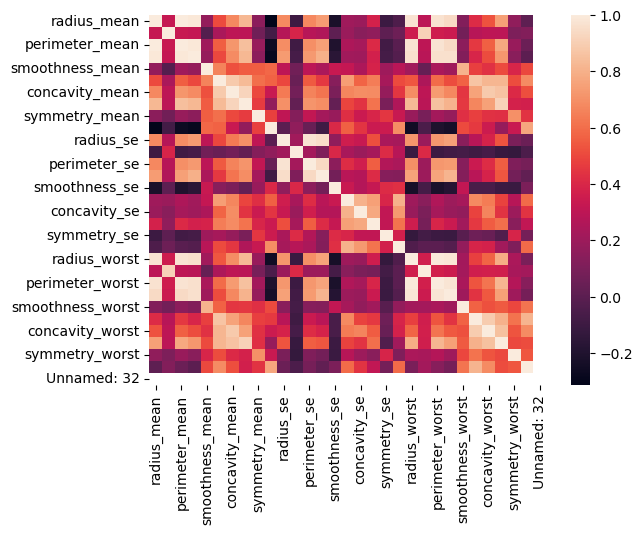

In [4]:
# Reviewing correlations

sns.heatmap(cancer.corr())

In [5]:
# Checking for NA and duplicate data

print(cancer.isnull().sum())
print(cancer.duplicated().sum())

# Column: Unnamed: 32 needs further investigation

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [6]:
# Reviewing Unnamed: 32

print(cancer['Unnamed: 32'].unique())

# Only NAN values, column can be dropped

cancer = cancer.drop(columns='Unnamed: 32')
print(cancer.columns)

# Column dropped

[nan]
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


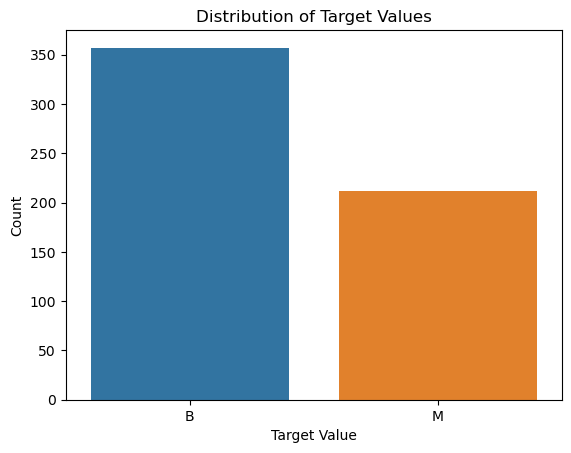

In [7]:
# Check balancing of target variable

target_counts = cancer['diagnosis'].value_counts()

# Create a bar plot using seaborn

sns.barplot(x=target_counts.index, y=target_counts.values)

# Add labels and title

plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Values')

# Display the plot

plt.show()

# Target variable needs balancing

In [8]:
# Defining variables

y = cancer['diagnosis']
X = cancer.drop(columns='diagnosis')

# Apply SMOTE class as the target variable is not balanced

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data

os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and for y

os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['diagnosis'])

# View DataFrame

print(os_data_X.head())
os_data_y.head()

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        13.74         17.91           88.12      585.0          0.07944   
1        13.37         16.39           86.10      553.5          0.07115   
2        14.69         13.98           98.22      656.1          0.10310   
3        12.91         16.33           82.53      516.4          0.07941   
4        13.62         23.23           87.19      573.2          0.09246   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.06376         0.02881              0.01329         0.1473   
1           0.07325         0.08092              0.02800         0.1422   
2           0.18360         0.14500              0.06300         0.2086   
3           0.05366         0.03873              0.02377         0.1829   
4           0.06747         0.02974              0.02443         0.1664   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

,diagnosis
0,B
1,B
2,B
3,B
4,B


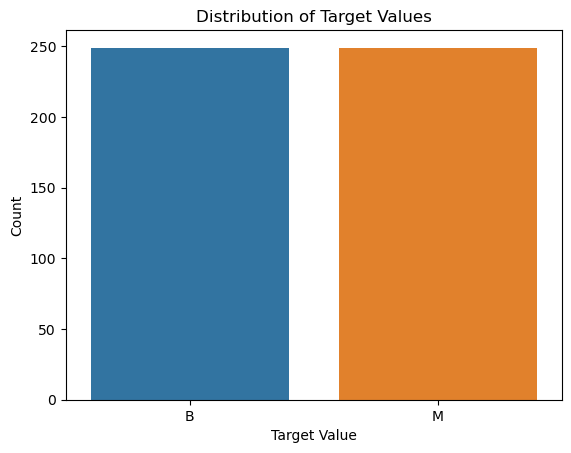

In [9]:
# Check balancing of target variable

target_counts = os_data_y['diagnosis'].value_counts()

# Create a bar plot using seaborn

sns.barplot(x=target_counts.index, y=target_counts.values)

# Add labels and title

plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Values')

# Display the plot

plt.show()

# Target variable is now balanced

In [10]:
# Using SVM for classification
# Create an SVM classifier using a linear kernel

clf = svm.SVC(kernel='linear', gamma='scale')  

# Train the model using the training sets.

clf.fit(os_data_X, os_data_y)  

# Predict the response for the test data set.

y_pred = clf.predict(X_test)

<AxesSubplot:>

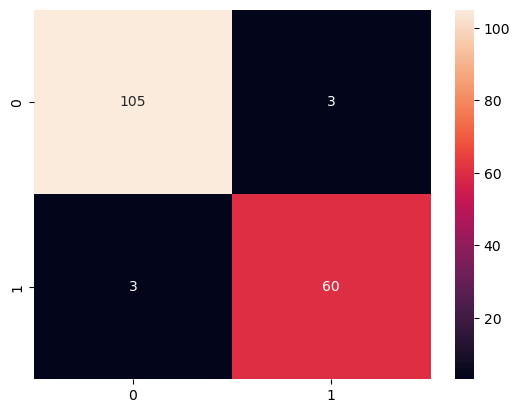

In [11]:
# Indicate that the confusion matrix needs to be created

confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.

sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [12]:
# Create a dataframe storing the confusion matrix

pd.DataFrame(confusion_matrix, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])


,predicted_healthy,predicted_cancer
is_healthy,105,3
is_cancer,3,60


In [13]:
print(metrics.accuracy_score(y_test, y_pred))

0.9649122807017544


In [14]:
# Print the accuracy and classification report

print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9649122807017544
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       108
           M       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### Like the decision tree model, the SVM model uses all of the Xs as multicollinearity must not be considered. This also leads to a very high accuracy. Comparing all of the three models deployed, we would choose the SVM model.

### Comparing model with usage of min-max-normalization and balancing:

In [15]:
# Normalise the data with the min-max feature scale

X = (X -np.min(X))/(np.max(X)-np.min(X)).values

# Apply SMOTE class as the target variable is not balanced

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data

os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and for y

os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['diagnosis'])

# View the values

os_data_X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,0.122999,...,0.263607,0.278252,0.232980,0.132889,0.171300,0.150488,0.124920,0.206838,0.154741,0.099042
1,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,0.174179,...,0.225187,0.285981,0.207082,0.109836,0.206894,0.219082,0.264217,0.308522,0.095210,0.139315
2,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582,...,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
3,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,0.141323,...,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.140895,0.282990,0.287601,0.094779
4,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.169545,...,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041


In [16]:
# Using SVM for classification
# Create an SVM classifier using a linear kernel

clf = svm.SVC(kernel='linear', gamma='scale')  

# Train the model using the training sets

clf.fit(os_data_X, os_data_y)  

# Predict the response for the test data set

y_pred = clf.predict(X_test)


,predicted_healthy,predicted_cancer
is_healthy,105,3
is_cancer,3,60


In [17]:
# Print the accuracy and classification report

print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9824561403508771
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



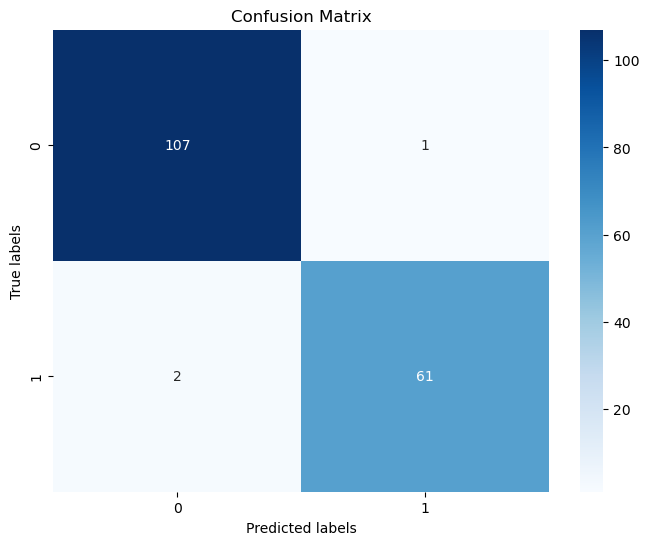

In [18]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


### Min-max normalization is producing slightly better results, leading to a 98.25% accuracy.